# Линейная регрессия

## Постановка задачи

Представим, что мы хотим определить цену в одном доме квартиры на основании площади квартиры. У нас есть база данных полученная от риэлтерской компании. В данном случае нам нужно найти зависимость между площадью квартиры и ценой квартиры. То есть, нужно найти функцию $f(X) = y$, где $X$ это площадь квартиры, а $y$ это цена на квартиру. Это и есть задача регрессии.

Другой пример. У нас есть интернет сайт и мы хотим предсказать сколько посититлей у нас будет в в определенное время, при этом у нас есть статистика посещений сайта от времени. Наша задача - используя имеющиеся данные о загруженности в прошлом, предсказать количество поситителей в интересующиее нас время. Тоесть по имеющимся данным построить зависимость интересующией нас переменной от каких то других параметров.

Рассмотрим подробнее пример с ценами на квартиру.
Давайте загрузим и визуализируем данные. Для этого нажмите *Ctrl+Enter* на следующей ячейке. После этого в вектре $X$ у нас будет площадь квартиры в $м^2$, а в вектре $y$ цена на квартиру. А внизу ячейки у нас будет диаграмму с точками.

Допустим мы знаем площадь и цены некоторых квартир в похожих домах

In [2]:
from regression_helper import * # не обращайте внимание на эту строчку
X, y = get_data()    # Загружаем данные в X и y

In [3]:
pd.DataFrame(X, columns=['Площадь квартиры'])

,Площадь квартиры
0,27
1,34
2,36
3,42
4,50
5,51
6,53
7,66


In [4]:
pd.DataFrame(X, columns=['Цена квартиры'])

,Цена квартиры
0,27
1,34
2,36
3,42
4,50
5,51
6,53
7,66


Отобразим эти точки на графике

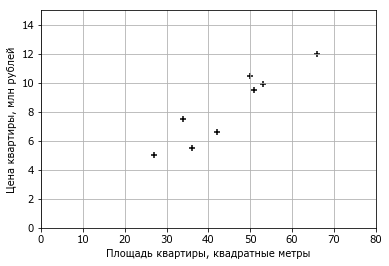

In [5]:
plot_data(X, y)      # Строим диаграму с точками

Видим, что чем больше площадь квартиры, тем выше ее цена. Можно сделать вывод, что между этими данными есть зависимость. Что если мы хотим расчитать стоимость квартиры с площадью 45, 60, и 25 ${м^2}$. Для данной задачи потребуется найти такую зависимость.

Допустим мы предполагаем, что данная зависимость может описаться линейной функцией вида $y = kX$, где $X$ это площадь квартиры, а $y$ ее цена, $k$ - коэффициент который мы попытаемся подобрать. Данную зависимость мы предлполагаем, это наша гипотеза. Давайте нанесем на график несколько линейных функций с разным коэффициентом.

In [6]:
choose_slope(X, y)

interactive(children=(IntSlider(value=170000, description='k', max=220000, min=150000, step=2000), Output()), …

## Функция ошибки

У нас есть гипотезы. Но как численно определить какая из них лучшая?

Для это введем функцию ошибку, также известную как функцию потерь. Функция ошибки - численное значение того, как наша гипотеза хорошо моделирует функцию.

Пусть у нас есть функция (наша модель)  $f(X) = kX = \hat{y}$. То есть, $\hat{y}$ является предсказанными нами значениями для X. А настоящие значения будут равны $y$. Тогда ошибку нашего предсказания на $i$-ом примере можно посчитать, как: $\hat{y_i} - y_i$. Если нам не важно в большую или в меньшую сторону мы ошибаемся, можем избавиться от знака, взяв либо модуль либо квадрат ошибки. Для начала давайте возьмем квадрат. Тогда ошибка $j(k)$ на i-ом примере будет равна $j(k) = (\hat{y_i} - y_i)^2 = (kX_i - y_i)^2$

Тогда мы можем посчитать суммарную ошибку $J(k)$ на всех примерах:

$J(k) = \frac{1}{N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2} = \frac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

Где $N$ - это количество квартир, $X_i$ - это площадь i-oй квартиры, $y_i$ - цена для i-oй квартиры, $\hat{y_i}$ - предсказанная цена для i-oй квартиры.
      
Например, $X_2=36$, $y_3=5500000.0$

$\sum_{i=0}^{N}$  - это знак суммирования.
Например, у нас есть $a_0, a_2, a_3, \cdots a_N$. Тогда $\sum_{i=0}^{N}{a_i} = a_0 + a_2 + a_3 + \cdots + a_N$

Ниже у нас есть пример с визуализацией ошибки для одной из гипотез.


In [7]:
plot_data_and_error(X, y)

interactive(children=(IntSlider(value=170000, description='k', max=220000, min=150000, step=2000), Output()), …

Давайте визуализируем ошибки для наших гипотез.

In [8]:
plot_data_and_J(X, y)

interactive(children=(IntSlider(value=170000, description='k', max=220000, min=150000, step=2000), Output()), …

Давайте теперь визуализируем всю функцию ошибки.

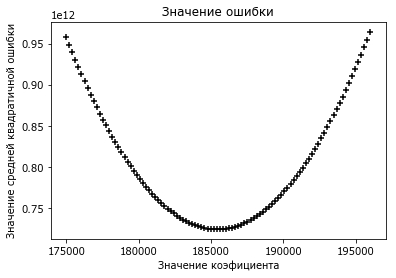

In [9]:
plot_all_J(X, y)

## Производная

Наша задачи - это минимизации функции ошибки. 
Я думаю, что вы знаете как можно найти значение минимума для данной функции. Нужно взять производную функции ошибки и приравнять ее к нулю. $J'(k) = \frac{dJ(k)}{dk} = 0$.

В данном случае производную можно рассматривать $f'(x_0) = \frac{f(x_0+\epsilon) - f(x_0)}{\epsilon}, \epsilon \rightarrow 0$ 

![alt](img\der.jpg) 

Например, для функции $f(x) = x^2$, $f'(x) = \frac{(x+\epsilon)^2 - x^2}{\epsilon} = \frac{x^2+ 2x\epsilon + \epsilon^2 - x^2}{\epsilon}= \frac{2x\epsilon + \epsilon^2}{\epsilon} = 2x + \epsilon = 2x$

$\epsilon \rightarrow 0$

Таким образом, в нашем случае:

$ J'(k) = \frac{dJ(k)}{dk} = \frac{d}{dk}(\frac{1}{2N}\sum_{i=1}^{N}{(y_i - \hat{y_i})^2}) 
= 2 \cdot \frac{1}{2N}\sum_{i=1}^{N} (kX_i - y_i)\frac{d}{dk}(kX_i - y_i) =
          \frac{1}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i$ 
          
И для нахождения минимума нужно приравнять производную к нулю. $ \frac{dJ(k)}{dk} = 0$

Решив уравнение, мы получим значение для $k=185072.4$

**Если будет время, заменить эпсилон на дельта икс**


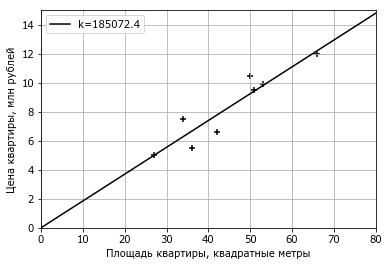

In [10]:
plot_data_and_hyp(X, y, 185072.4)

Но в реальных приложениях не всегда возможно решить это уравнение (далее я расскажу поподробнее о таких ситуациях). Поэтому, познакомимся с такой техникой как градиентный спуск. Как вызнаете, значение производной в точке равно значению тангенса угла наклона касательной в данной точке.

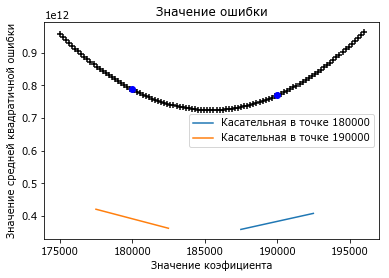

In [11]:
plot_all_J_with_der(X, y)

## Градиентный спуск

Использую эту информацию мы можем понять где находится минимум и изменить значение $k$ в сторону минимума. Если производная положительная (как касательная в точке 190000), то нам нужно уменьшать значение $k$. Если производная отрицательная (как касательная в точке 180000), то нам нужно увеличить значение $k$.  

Таким образом сам алгоритм градиентного спуска можно описать следующим образом.

* Выбираем случайное значение для $k$
* Повторить пока не сойдется:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \frac{d}{dk} J(k)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$

Где $\alpha$ это коэффициент, который мы выбреем. Теперь поэкспериментируем со значением $\alpha$ и начальным значением коэффициента.

In [12]:
Traice(X, y)

interactive(children=(IntSlider(value=176000, description='K init:', max=196000, min=176000, step=2000), Float…

**Тут введено понятия МНК, думаю надо рассказать, 
что можно делать не только МНК, еще есть например МАЕ, где лучше использовать, почему, на одном графике построить МНК и МАЕ.
Можно добавить, что МНК это мат ожидание, МАЕ медиана**

# Цена квартиры в зависимости от площади и дальности квплощадьартиры от центра Москвы
Допустим теперь нам требуется определить цену квартиры в зависимости от квартиры и дальности квартиры от центра Москвы. То есть, теперь у нас есть 2 параметра. И наша функция, которую мы хотим найти будет выглядеть вот так $y = F(X^{площадь}, X^{дальность})$, где $X^{площадь}$ площадь квартиры в $м^2$, $X^{дальность}$ дальность квартиры от центра в км, а $y$ цена на квартиру.

**Взять реальный пример. Усложнить формулы сделав их более общими**

In [9]:
X_square, X_distance, y = get_new_data()
print_3d_table_with_data(X_square, X_distance, y)
plot_new_3d_data(X_square, X_distance, y)

    Площадь квартиры  Расстояние до центра  Цена квартиры
0                 40                    95      7400000.0
1                 27                    64      6600000.0
2                 47                    68     10200000.0
3                 20                    41      6400000.0
4                 42                    71      9200000.0
5                 56                    20     14400000.0
6                 54                    85     10700000.0
7                 33                    93      6000000.0
8                 44                    42     10700000.0
9                 74                    44     16900000.0
10                53                    50     12400000.0
11                33                    72      7500000.0
12                51                    29     13000000.0
13                58                    68     12200000.0
14                59                     3     16000000.0
15                20                    93      3500000.0
16            

interactive(children=(IntSlider(value=0, description='Вертикальное', max=180), IntSlider(value=0, description=…

Для решения данной проблемы введем нашу гипотезу: $f(X^{площадь}, X^{дальность}) = k_0 + k_1 X^{площадь} + k_2 X^{дальность} = \hat{y}$. Это линейная функция для двух входных параметров.

Тогда определим нашу функцию ошибки от параметров $k_0, k_1, k_2$:

$J(k) = \frac{1}{2N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{2N} \sum_{i=1}^{N}{(k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i  - y_i)^2}$

Где $N$ - это количество квартир, $X^{площадь}_i$ - это площадь i-oй квартиры, $X^{дальность}_i$ - это расстояние квартиры до центра Москвы, а $y_i$ - цена для i-oй квартиры, $\hat{y_i}$ - предсказанная цена для i-oй квартиры.

Для нахождения этих коэффициентов также используем градиентный спуск. Но теперь нам необходимо найти производную от функции ошибки для каждого коэффициента.

$\frac{\delta  J(k_0, k_1, k_2)}{\delta k_0} = \frac{1}{N}\sum_{i=1}^{N} (k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i  - y_i)$ 

$\frac{\delta J(k_0, k_1, k_2)}{\delta k_1} = \frac{1}{N}\sum_{i=1}^{N} (k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i  - y_i)X^{площадь}_i$ 

$\frac{\delta J(k_0, k_1, k_2)}{\delta k_2} = \frac{1}{N}\sum_{i=1}^{N} (k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i - y_i)X^{дальность}_i$ 

Мы также можем приравнять каждую производную к нулю и найти решение системы уравнений. Но делать это не целесообразно. Для решения данной системы в компьютере потребуется построить матричное уравнение. А в процессе решения потребуется найти обратную матрицу. Данная операция является очень медленной, даже на современных компьютерах. В данном примере у нас всего 2 входных параметра и 20 значений $X$. Вычисления обратной матрицы для нашего примера займет микросекунды. Но в реальных приложениях обычно бывает и по десяткам тысяч входных параметров и сотни миллионов значений. Нахождения обратной матриц для таких задач займет несравнимо много времени по сравнению с градиентным спуском. Поэтому в промышленности применяется именно градиентный спуск. 

Полный алгоритм градиентного спуска c $M$ коэффициентами можно описать следующим образом.

* Выбираем случайное значение для $k_0, k_1, ... k_M$
* Повторить пока не сойдется:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{0_{new}} = k_0 - \alpha \cdot \frac{\delta }{\delta k_0} J(k_0, k_1, ... , k_M)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{1_{new}} = k_1 - \alpha \cdot \frac{\delta }{\delta k_1} J(k_0, k_1, ... , k_M)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ \cdots $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{M_{new}} = k_M - \alpha \cdot \frac{\delta }{\delta k_M} J(k_0, k_1, ... , k_M)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_0 = k_{0_{new}}, k_1 = k_{1_{new}} \cdots k_M = k_{M_{new}}$
    

Где $\alpha$ это коэффициент, который мы выбираем. 

Давайте теперь визуализируем ошибку.


In [10]:
plot_loss_in_3d(X_square, X_distance, y)

interactive(children=(IntSlider(value=0, description='Вертикальное', max=180), IntSlider(value=0, description=…

Тогда если мы используем формулы выше, то мы увидим следующую картину.

In [11]:
a=0.0001
k1, k2 = lin_grad_full(X_square, X_distance, y, alpha=a, iters=50, k0_init=5000000, k1_init=500000, k2_init=-200000)

interactive(children=(IntSlider(value=0, description='Вертикальное', max=180), IntSlider(value=0, description=…

А теперь визуализируеим полученный результат.

In [12]:
plot_new_data_and_hyp(X_square, X_distance, y, 5000000, k1, k2)

interactive(children=(IntSlider(value=0, description='Вертикальное', max=180), IntSlider(value=0, description=…

# Переобучение и слишком простая модель

Как вы понимаете линейные функции не всегда могут быть использована для все данных. Например, допустим у нас есть следующий набор данных:

![alt](img\new_data.png)

Линейная регрессия может предсказать только прямую линию, но тут такое не пойдет. Нам нужно что-то по сложнее. То есть, наша модель слишком простая.

## Полиномы

Полиномом степени n называется функция $poly(X) = k_n X^n + k_{n-1} X^{n-1}  \ldots + k_1 X + k_0$. Известное вам квадратное уравнение — это полином второй степени. $quadratic(X) = k_2 X^2 + k_1 X + k_0$, или как вы привыкли его видеть: $quadratic(X) = a X^2 + b X + c$.

**Заменить картинку и рассказать прмиеры**

![alt](img\polynomes.png)

В дальнейшем мы будем использовать полиномиальную регрессию. Ее можно простым образом получить из линейной регрессии. 
Как вы уже догадались формула линейной регрессии от M параметров можно записать следующим образом:
$ f(X^{\textrm{(1-ый параметр)}}, 
    X^{\textrm{(2-ой параметр)}}, 
    \cdots, 
    X^{\textrm{(M-1-ый параметр)}}, 
    X^{\textrm{(M-ый параметр)}}) 
    = 
    k_0 + 
    k_1 X^{\textrm{(1-ый параметр)}} + 
    k_2 X^{\textrm{(2-ой параметр)}} + 
    \cdots + 
    k_{M - 1} X^{\textrm{(M-1-ый параметр)}} + 
    k_M X^{\textrm{(M-ый параметр)}}$.

Но заменив $X^{\textrm{(i-ый параметр)}}$ на $X^{i}$. Мы получим формулу для полинома от $X$. Напоминаю, что $X^{i}$ значит значение $X$ в степени i. То есть, мы передаем в формулу линейной регрессии $X^i$, вместо i-го параметра.

$ f(X, 
    X^2, 
    \cdots, 
    X^{M-1}, 
    X^M) = k_0 + k_1 X + k_2 X^2 + \cdots + k_{M - 1} X^{M - 1} + k_M X^{M} = poly(X)$.


Давайте получим и визуализируем новые данные.

** Картинки с переобучение. Недообучние и норм**

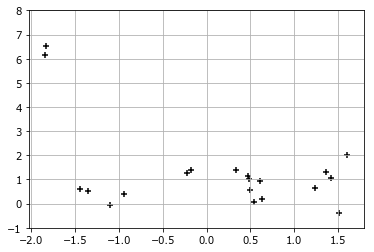

In [13]:
X, y = get_poly_data()
plot_more_poly_data(X, y)

Теперь посмотрим, как различные полиномы могут репрезентировать данные.

In [18]:
plot_poly_data(X, y)

interactive(children=(IntSlider(value=1, description='Степень полинома', max=19, min=1), Output()), _dom_class…

Но нужно помнить, что не всегда у нас может быть хороший набор данных. Допустим после того как мы обучили нашу модель мы собрали еще данных.  

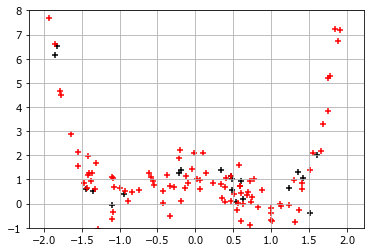

In [15]:
X1, y1 = get_more_poly_data()
plot_more_poly_data(X, y, X1, y1)

Теперь посмотрим на ошибку также на новых данных.

In [16]:
plot_poly_data(X, y, X1, y1)

interactive(children=(IntSlider(value=1, description='Степень полинома', max=19, min=1), Output()), _dom_class…

То есть, слишком сложная модель переобучается на данных. 

Для решения этой проблемы мы делим наши данные на обучающий набор и тестовый набор. Модель обучается на тестовом наборе, но окончательная оценка производится по тестовому набору. 


**Не очень наглядные картинки, надо добавить попроще и привести в противовес переобучения - недоообучение**

**Не рассказзано про метрики качества регрессии, R2, smape, MAE...,
где когда лучше применять, например если предсказываем выручку, то MSE покажет что? квадратные рубли? надо смотреть что то еще**

**Рассказать про регуляризацию, например начать с того, что при переобучении у линейной модели будут очень большие веса, 
поймем что большие веса это плохо, как сделать их меньше? Ввести регуляризацию, можно привести пример аналитического решения с ней, получить регуляризацию по Тихонову.
Можно привести пример с ошибками(бывает большой разброс и бывает смещение, что делает регуляризация? оставляет смещение и убирает разброс на сколько я помню)
Нарисовать картинки с регуляризацией (кружочек для L2, ромбик для L1, покажем что L1 еще и фичи зануляет)**

**Ничего не сказали про нормировку данных, если в модель засунуть фичи которые отличаются на порядки, хорошо это будет?**

**обучить модельку из scikit-learn**

**Повторить все что мы сделали (рассказать про пайплайн)**

# Задание

1. Сделать линейную функцию
2. Сделать функцию ошибки
3. Рассчитать градиент
4. Реализовать градиентный спуск
Задания следует делать одно за другим.

Для начала запустим следующую ячейку, которая визуализирует наши данные.

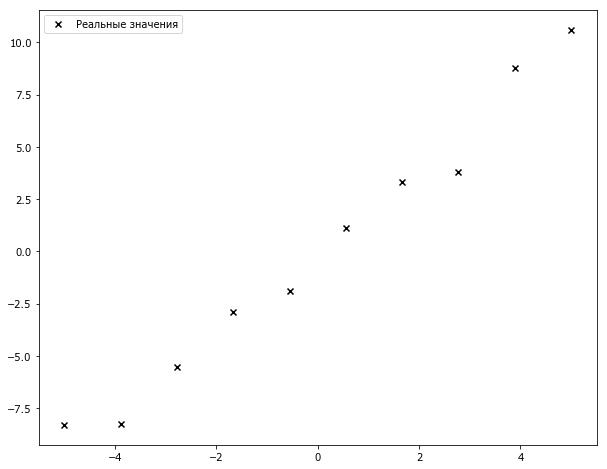

In [19]:
import numpy as np # подгружаем дополнительную библиотеку
from regression_task import *

plot_data()

##### Реализовать линейную функцию вида $y = kx$. 
   На вход функции передается значение коэффициента $\mathbf{k}$ (действительное число), и вектор-столбец $\mathbf{X}$ размера Nx1. Функция должна  возвращать вектор-столбец $\mathbf{y}$ размера Nx1. 
   То есть, вектор столбец y можно записать как:
   
   \begin{equation*}
    \mathbf{y} = \begin{pmatrix}
    y_0 \\
    y_1 \\
    \cdots \\
    y_N \\
    \end{pmatrix} = 
    \begin{pmatrix}
    k x_1 \\
    k x_2 \\
    \cdots \\
    k x_N \\
    \end{pmatrix}
    \end{equation*}

In [ ]:
def linear_function(k, X):
    # Напоминаю, что код нужно писать в области между звездочками. 
    # Вы можете решить данную задачу с помощью цикла, но 
    # постарайтесь решить ее с помощью векторизации.

    y = np.zeros_like(X) # создаем переменную y и заполняем ее нулями
    N = X.shape[0]       # получаем размер вектора столбца

    #***********************************************************************
    y = k * X
   
    
    #***********************************************************************

    return y
 
check_linear_function(linear_function)


##### Реализовать функцию потерь $J(k) = \frac{1}{2N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{2N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2}$

На вход функции передается значение коэффициента $\mathbf{k}$ (действительное число), и вектор-столбец $\mathbf{X}$ размера Nx1 и вектор-столбец $\mathbf{y}$ c с реальными значениями размера Nx1. Функция должна возвращать действительное число равное $J(k)$.


In [ ]:
def loss_function(k, X, y):
    # Ты можешь использовать функцию linear_function из предыдущего задания
    # Для того, что бы найти значение f(X)
    # Не бойся создавать новые переменные. 
    # Помни что ты можешь вычитать один вектор из другого, а также помни что,
    # ты можешь почленно вводить в степень вектор. 
    
    # Результат функции потерь должен быть записан в переменную J
   
    
    N = X.shape[0]       # получаем размер вектора столбца
    
    J = 0

    #***********************************************************************
    J = sum((k*X - y)**2)/(2*N)

    #***********************************************************************

    return J
   
check_loss_function(loss_function)


##### Реализовать градиент(произвоодную) $J'(k) = \frac{dJ(k)}{dk} = \frac{1}{N} \sum_{i=1}^{N} (f(X_i) - y_i) X_i  = \frac{1}{N} \sum_{i=1}^{N} (kX_i - y_i) X_i$ 
          
          
На вход функции передается значение коэффициента $\mathbf{k}$ (действительное число), и вектор-столбец $\mathbf{X}$ размера Nx1 и вектор-столбец $\mathbf{y}$ c с реальными значениями размера Nx1. Функция должна возвращать градиент равный $J'(k)$.


In [ ]:
def gradient_function(k, X, y):
    # Ты можешь использовать функцию linear_function из предыдущего задания
    # Для того, что бы найти значение f(X)
    # Не бойся создавать новые переменные. 
    # Помни что ты можешь вычитать один из другого, а также помни что,
    # ты можешь почленно перемножать вектора вектор. 
    
    # Результат функции потерь должен быть записан в переменную grad
        
    N = X.shape[0]       # получаем размер вектора столбца
    
    grad = 0

    #***********************************************************************

    grad = sum((k * X - y) * X) / (len(X))
                       
    #***********************************************************************

    return grad
   
check_gradient_function(gradient_function)

##### Финишная прямая. Пора реализовать алгоритм градиентного спуска. 
На вход функции передается начальное значение коэффициента $\mathbf{k}$ (действительное число), и вектор-столбец $\mathbf{X}$ размера Nx1 и вектор-столбец $\mathbf{y}$ c реальными значениями размера Nx1, значение коэффициента альфа $\alpha$ и число $iters$ равное количеству итераций в алгоритме. 
Сам алгоритм мы будем использовать в следующем виде
* Повторить $iters$ раз:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k - \alpha \cdot J'(k)$


In [ ]:
def gradient_descent(k_init, X, y, alpha, iters):
    # Лучше всего использовать функцию gradient_function для 
    # нахождения градиента, чем пересчитывать его еще раз
    
    # И еше я прошу перед тем как изменить значение k в массиве 
    # k_old.
    # Например, i это счетчик цикла.
    # Тогда значение k можно сохранить как k_old[i] = k
        
    k = k_init
    k_old = np.array([0.0]*iters)


    #***********************************************************************

    for i in range (0, iters):
        k_old[i] = k
        k = k - (alpha * gradient_function(k, X, y))
        

    #***********************************************************************

    return k, k_old
    
check_gradient_descent(gradient_descent)
